In [2]:
!pip install earthengine-api folium geemap

  Preparing metadata (setup.py) ... one
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 2.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 1.9 MB/s eta 0:00:00a 0:00:01
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.2 MB/s eta 0:00:00a 0:00:01
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)
  Created wheel for pyperclip: filename=py

In [3]:
import ee

# Initialize Earth Engine
ee.Initialize()

# Test dataset retrieval
dataset = ee.Image("NASA/ASTER_GED/AG100_003")
print("GEE is working correctly!")

GEE is working correctly!


In [4]:
import ee
ee.Authenticate()
ee.Initialize()

In [6]:
import ee
import numpy as np
import matplotlib.pyplot as plt
import geemap
import folium

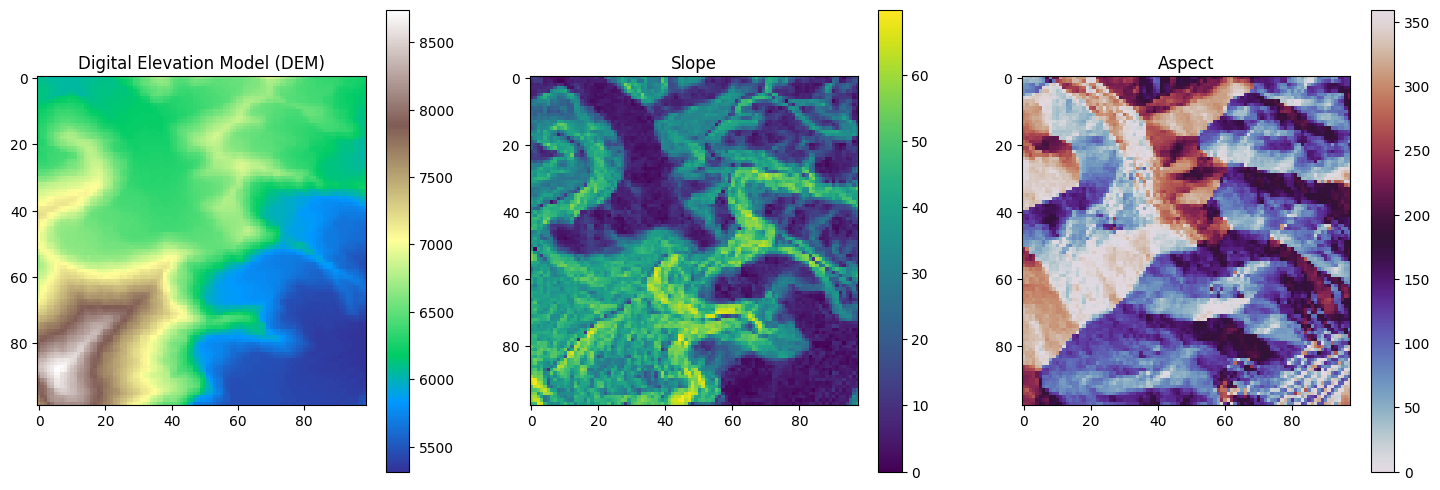

In [20]:
# Define a smaller region (Adjust as needed)
roi = ee.Geometry.BBox(86.92, 27.98, 87.0, 28.06)

# Load the DEM data
dem = ee.Image("USGS/SRTMGL1_003").clip(roi)

# Compute Slope and Aspect
slope = ee.Terrain.slope(dem)
aspect = ee.Terrain.aspect(dem)

# Increase scale to reduce pixel count (Higher scale = Lower resolution)
scale = 90  # Adjust if needed

# Function to extract band name dynamically
def get_band_name(image):
    return image.bandNames().get(0).getInfo()

# Function to convert EE Image to NumPy array using reduceRegion()
def image_to_numpy(image, region, scale):
    """Converts an Earth Engine image to a NumPy array with spatial structure."""
    band_name = get_band_name(image)  # Get actual band name
    reduction = image.reduceRegion(
        reducer=ee.Reducer.toList(),
        geometry=region,
        scale=scale,
        maxPixels=1e6
    ).getInfo()
    
    if band_name in reduction:
        return np.array(reduction[band_name]).reshape(-1, int(np.sqrt(len(reduction[band_name]))))
    else:
        raise KeyError(f"Band '{band_name}' not found in the result.")

# Convert images to NumPy arrays
dem_np = image_to_numpy(dem, roi, scale)
slope_np = image_to_numpy(slope, roi, scale)
aspect_np = image_to_numpy(aspect, roi, scale)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# DEM Plot
im1 = axes[0].imshow(dem_np, cmap='terrain', origin='upper')
axes[0].set_title("Digital Elevation Model (DEM)")
plt.colorbar(im1, ax=axes[0])

# Slope Plot
im2 = axes[1].imshow(slope_np, cmap='viridis', origin='upper')
axes[1].set_title("Slope")
plt.colorbar(im2, ax=axes[1])

# Aspect Plot
im3 = axes[2].imshow(aspect_np, cmap='twilight', origin='upper')
axes[2].set_title("Aspect")
plt.colorbar(im3, ax=axes[2])

plt.show()